In [2]:
# Dependencies
import pandas as pd
import numpy as np
import requests
import json
from citipy import citipy
import openweathermapy.core as owm
import random
from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns
from config import wkey

In [3]:
# assigning variable to the citipy cities dictionary
city = citipy.WORLD_CITIES_DICT
#creating a city list to loop through citipy
cities=[]

#looping through citipy to get list of 500 random lat and longitude
for i in range(500):
   a = list(city)
   b = random.choice(a)
   cities.append(b)

#placing random list of 500 cities from citipy into a dataframe
import_df= pd.DataFrame(cities)

# New data frame with formated columns to hold randomly lat & lng & weather info
cities_df = pd.DataFrame()
cities_df["Latitude"] = import_df[0]
cities_df["Longitude"] = import_df[1]
cities_df["City Name"] = ""
cities_df["Country Code"] = ""
cities_df["Temperature"] = ""
cities_df["Cloudiness"] = ""
cities_df["Wind Speed"] = ""
cities_df["Humidity"] = ""

cities_df.head()

,Latitude,Longitude,City Name,Country Code,Temperature,Cloudiness,Wind Speed,Humidity
0,51.166667,3.866667,,,,,,
1,53.483333,-2.333333,,,,,,
2,22.033333,79.716667,,,,,,
3,54.137451,37.587422,,,,,,
4,50.463311,2.993761,,,,,,


In [4]:
#looping through the latitude and longitude values from citypy to get the city name and country code
for index,row in cities_df.iterrows():
    city = citipy.nearest_city(row["Latitude"],row["Longitude"])
    cities_df.set_value(index,"City Name",city.city_name)
    cities_df.set_value(index,"Country Code",city.country_code)
    
cities_df.head()

C:\Users\brgrave1\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\brgrave1\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  after removing the cwd from sys.path.


,Latitude,Longitude,City Name,Country Code,Temperature,Cloudiness,Wind Speed,Humidity
0,51.166667,3.866667,wachtebeke,be,,,,
1,53.483333,-2.333333,eccles,gb,,,,
2,22.033333,79.716667,barghat,in,,,,
3,54.137451,37.587422,mendeleyevskiy,ru,,,,
4,50.463311,2.993761,oignies,fr,,,,


In [6]:
# Create settings dictionary with information we're interested in

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial"
settings = {"units": "metric", "appid": wkey}
for index,row in cities_df.iterrows():
    city = row["City Name"]
    country = row ["Country Code"]
    city_country = str(city)+ "," + str(country)
    
    #using try and except method incase API has missing data for random sample of cities
    try:
        #creating variable for API call       
        current_weather_url = url + "&appid=" + wkey + "&q=" + city_country
        current_weather = requests.get(current_weather_url).json()
        #appending data pulled in the loop to the cities dataframe
        cities_df.set_value(index, "Temperature", current_weather.get("main",{}).get("temp"))
        cities_df.set_value(index, "Humidity", current_weather.get("main",{}).get("humidity"))
        cities_df.set_value(index, "Cloudiness", current_weather.get("clouds",{}).get("all"))
        cities_df.set_value(index, "Wind Speed", current_weather.get("wind",{}).get("speed"))
        print(f"Running Current Weather Information for {city}")
        print(current_weather_url)
    except:
        cities_df.set_value(index, "Temperature", current_weather.get("main",{}).get("temp"))
        cities_df.set_value(index, "Humidity", current_weather.get("main",{}).get("humidity"))
        cities_df.set_value(index, "Cloudiness", current_weather.get("clouds",{}).get("all"))
        cities_df.set_value(index, "Wind Speed", current_weather.get("wind",{}).get("speed"))
        print(f"No Data found for {city}")
        print(current_weather_url)  
              


C:\Users\brgrave1\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  app.launch_new_instance()
C:\Users\brgrave1\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\brgrave1\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\brgrave1\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


Running Current Weather Information for wachtebeke
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=wachtebeke,be
Running Current Weather Information for eccles
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=eccles,gb
Running Current Weather Information for barghat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=barghat,in
Running Current Weather Information for mendeleyevskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=mendeleyevskiy,ru
Running Current Weather Information for oignies
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=oignies,fr
Running Current Weather Information for lesogorsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=lesogorsk,ru
Runnin

Running Current Weather Information for timiryazevskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=timiryazevskiy,ru
Running Current Weather Information for yakima
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=yakima,us
Running Current Weather Information for kambja
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=kambja,ee
Running Current Weather Information for sohagpur
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=sohagpur,in
Running Current Weather Information for dianalund
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=dianalund,dk
Running Current Weather Information for stephenville crossing
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=stephenvi

Running Current Weather Information for brits
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=brits,za
Running Current Weather Information for myitkyina
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=myitkyina,mm
Running Current Weather Information for sao goncalo do amarante
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=sao goncalo do amarante,br
Running Current Weather Information for newington
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=newington,us
Running Current Weather Information for yashiro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=yashiro,jp
Running Current Weather Information for krithia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=kri

Running Current Weather Information for bantay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=bantay,ph
Running Current Weather Information for naberera
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=naberera,tz
Running Current Weather Information for elmvale
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=elmvale,ca
Running Current Weather Information for lyubim
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=lyubim,ru
Running Current Weather Information for lake mary
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=lake mary,us
Running Current Weather Information for mezohegyes
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=mezohegyes,hu
Running Current Weat

Running Current Weather Information for binanwanaan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=binanwanaan,ph
Running Current Weather Information for san patricio
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=san patricio,py
Running Current Weather Information for sikea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=sikea,gr
Running Current Weather Information for kismayo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=kismayo,so
Running Current Weather Information for khalabat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=khalabat,pk
Running Current Weather Information for kogota
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=kogota,jp
Running Curren

Running Current Weather Information for nepomuceno
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=nepomuceno,br
Running Current Weather Information for hoshcha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=hoshcha,ua
Running Current Weather Information for tarpon springs
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=tarpon springs,us
Running Current Weather Information for aulum
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=aulum,dk
Running Current Weather Information for pinambaran
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=pinambaran,ph
Running Current Weather Information for sinnar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=sinnar,in
Running 

Running Current Weather Information for santa cruz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=santa cruz,hn
Running Current Weather Information for trebinje
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=trebinje,ba
Running Current Weather Information for cagbang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=cagbang,ph
Running Current Weather Information for becsehely
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=becsehely,hu
Running Current Weather Information for edgewood
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=edgewood,us
Running Current Weather Information for roccapiemonte
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=roccapiemonte,it
Ru

Running Current Weather Information for carot
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=carot,ph
Running Current Weather Information for bougado
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=bougado,pt
Running Current Weather Information for masapang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=masapang,ph
Running Current Weather Information for asind
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=asind,in
Running Current Weather Information for lopsmarka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=lopsmarka,no
Running Current Weather Information for tokawal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=tokawal,ph
Running Current Weather Inform

Running Current Weather Information for mamatid
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=mamatid,ph
Running Current Weather Information for yeghvard
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=yeghvard,am
Running Current Weather Information for depok
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=depok,id
Running Current Weather Information for taichung
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=taichung,tw
Running Current Weather Information for sao domingos do maranhao
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=sao domingos do maranhao,br
Running Current Weather Information for nueva loja
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=nu

Running Current Weather Information for altadena
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=altadena,us
Running Current Weather Information for schriesheim
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=schriesheim,de
Running Current Weather Information for lacey
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=lacey,us
Running Current Weather Information for nekrasovskaya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=nekrasovskaya,ru
Running Current Weather Information for campbell
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=campbell,us
Running Current Weather Information for mvomero
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=mvomero,tz
Running 

In [7]:
cities_df.head()

,Latitude,Longitude,City Name,Country Code,Temperature,Cloudiness,Wind Speed,Humidity
0,51.166667,3.866667,wachtebeke,be,41.74,0,3.36,86
1,53.483333,-2.333333,eccles,gb,40.44,20,5.82,86
2,22.033333,79.716667,barghat,in,65.83,0,8.66,32
3,54.137451,37.587422,mendeleyevskiy,ru,6.56,0,2.95,70
4,50.463311,2.993761,oignies,fr,43.36,0,9.17,75


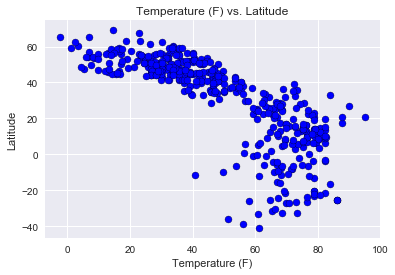

In [8]:
#Temperature (F) vs. Latitude

#using seaborn
sns.set()
#assigining variables to x and y axis
temp= cities_df["Temperature"]
lat= cities_df["Latitude"]

#creating and formating scatter plot
plt.scatter(temp, lat, marker="o", color="blue",edgecolors="black", )
plt.title("Temperature (F) vs. Latitude")
plt.xlabel("Temperature (F)")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()

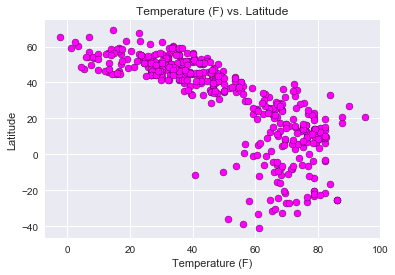

In [9]:
#Humidity (%) vs. Latitude

#using seaborn
sns.set()
#assigining variables to x and y axis
temp= cities_df["Temperature"]
lat= cities_df["Latitude"]

#creating and formating scatter plot
plt.scatter(temp, lat, marker="o", color="magenta",edgecolors="black", )
plt.title("Temperature (F) vs. Latitude")
plt.xlabel("Temperature (F)")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()

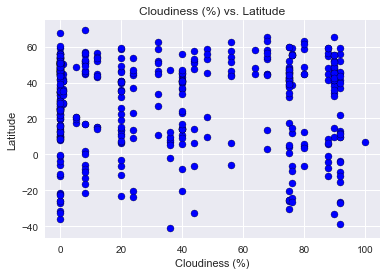

In [10]:
#Cloudiness (%) vs. Latitude
#using seaborn
sns.set()
#assigining variables to x and y axis
cloudiness= cities_df["Cloudiness"]
lat= cities_df["Latitude"]

#creating and formating scatter plot
plt.scatter(cloudiness, lat, marker="o", color="blue",edgecolors="black", )
plt.title("Cloudiness (%) vs. Latitude")
plt.xlabel("Cloudiness (%)")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()

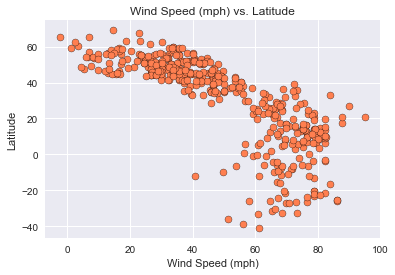

In [11]:
#Wind Speed (mph) vs. Latitude
#using seaborn
sns.set()
#assigining variables to x and y axis
wind= cities_df["Wind Speed"]
lat= cities_df["Latitude"]

#creating and formating scatter plot
plt.scatter(temp, lat, marker="o", color="coral",edgecolors="black", )
plt.title("Wind Speed (mph) vs. Latitude")
plt.xlabel("Wind Speed (mph)")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()